<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/Logistic_Regression_Classifier_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Importando as bibliotecas

In [ ]:
import numpy as np
# detalhes da função LogisticRegression podem ser acessados em [1]
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Função que plota a região limite entre as classes preditas no modelo

In [ ]:
def plot_classifier(classifier, X, y):
    # define ranges to plot the figure
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot
    plt.figure()

    # choose a color scheme you can find all the options
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

    plt.show()

Teste inicial com um banco de dados simples

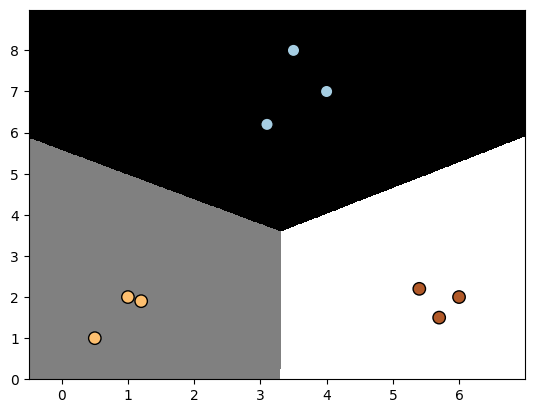

In [ ]:
# input data
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

# initialize the logistic regression classifier --> maiores detalhes consultar [1]
#classifier = LogisticRegression(solver='liblinear', C=100)
classifier = LogisticRegression()

# train the classifier
classifier.fit(X, y)

# draw datapoints and boundaries
plot_classifier(classifier, X, y)

Criando um banco de dados mais completo

In [ ]:
from sklearn.datasets import make_blobs
X2, y2 = make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=0.8, shuffle=True, random_state=0)

In [ ]:
X2.shape

(400, 2)

In [ ]:
from collections import Counter
print('Class total amount:', Counter(y2))

Class total amount: Counter({np.int64(1): 200, np.int64(0): 200})


Separando o banco de dados com 70% para treino e 30% para testes

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=0)
print('Treinamento: X_train =', X_train.shape)
print('Testes: X_test =', X_test.shape)

Treinamento: X_train = (280, 2)
Testes: X_test = (120, 2)


Plotando o banco de dados de treinamento

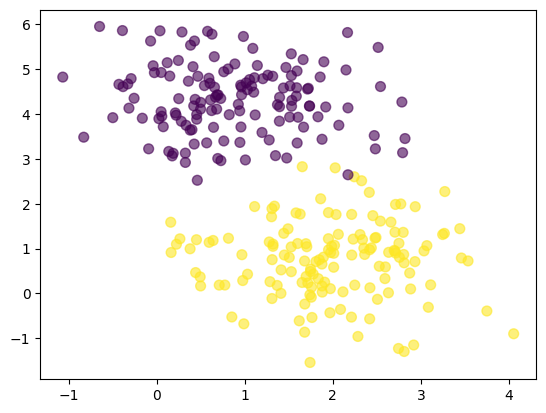

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50, alpha=0.6)
plt.show()

Treinando o Classificador com o banco de dados de treinamento e observando a região limite entre as classes preditas no modelo

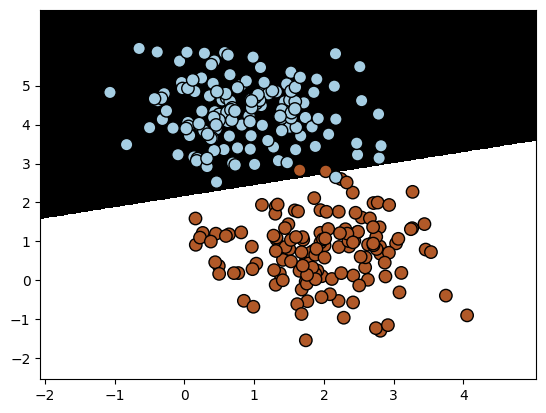

In [ ]:
# initialize the logistic regression classifier
classifier2 = LogisticRegression()

# train the classifier
classifier2.fit(X_train, y_train)

# draw datapoints and boundaries
plot_classifier(classifier2, X_train, y_train)

Medindo a acuráricia do modelo no banco de trainamento

In [ ]:
classifier2.score(X_train,y_train)

0.9892857142857143

Vamos agora predizer novos valores de `y` para o banco de dados de testes.


In [ ]:
y_pred = classifier2.predict(X_test)

Plotando o banco de dados de testes com os valores das classes preditas no modelo (`y_pred`)

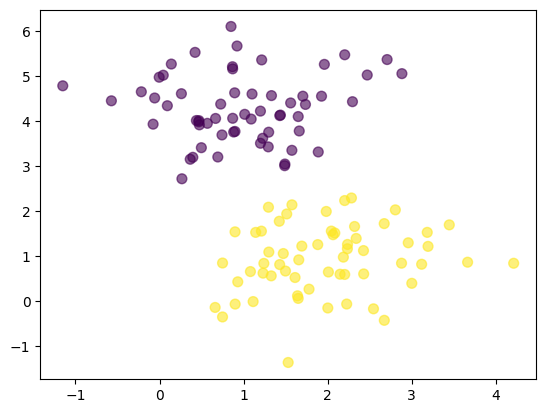

In [ ]:
#plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, s=50, alpha=0.6)
plt.show()

Quais foram as predições erradas?

In [ ]:
err=X_test[y_test!=y_pred]
err

array([[1.29550716, 2.08571312]])

Plotando em vermelho as predições erradas feitas no banco de dados de testes

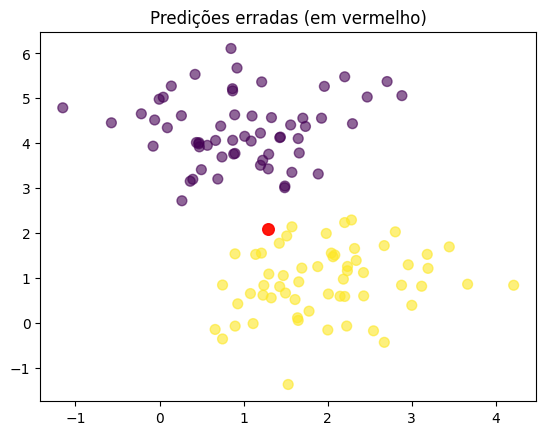

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, s=50, alpha=0.6)
plt.scatter(err[:,0], err[:,1], s=70, alpha=0.9, c='red')
plt.title('Predições erradas (em vermelho)')
plt.show()

# outra maneira de se plotar o mesmo
#plt.scatter(X_test[:,0][y_test!=y_pred], X_test[:,1][y_test!=y_pred], s=70, c='red')
#plt.scatter(X_test[:,0][y_test==y_pred], X_test[:,1][y_test==y_pred], c=y_test[y_test==y_pred], s=50, alpha=0.6)
#plt.show()

Medindo a acurácia do modelo no banco de testes

In [ ]:
classifier2.score(X_test,y_test)

0.9916666666666667

Outra maneira de medir a acurácia, utilizando `sklearn.metrics`

In [ ]:
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test,y_pred)
print("Accuracy:",result)

Accuracy: 0.9916666666666667


# Exercícios

Exercício 1: Experimentos com dados sintéticos e regressão logística

- Use make_blobs para gerar dados com 3 e depois 4 classes, e avalie a acurácia do modelo em treino e teste.

- Altere a porcentagem de dados para teste para 10% e 20% e compare os resultados.

- Utilize make_moons com diferentes parâmetros (n_samples=200, noise=0.4 e depois n_samples=400, noise=0.3), aplique regressão logística e compare as acurácias.

- Otimize os hiperparâmetros tol e max_iter da função LogisticRegression() para melhorar a acurácia nos testes.


##Referências
[1] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

[2] https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

[3] https://www.datacamp.com/tutorial/understanding-logistic-regression-python

[4] https://scikit-learn.org/stable/modules/linear_model.html